In [7]:
import pandas as pd
import numpy as np
import re
import string
import unidecode
import nltk
import os


# Aqui os .txt estao dentro da pasta loop
files = os.listdir('loop') # mudar para o diretorio que tenha todos os .txt dos tweets
lista_pandas = list()
regex = re.compile(r'(?<=tweets_)[a-zA-Z\s]{2,}')

for file in files:
    d = pd.read_csv(os.path.join('loop',file), sep="\t")
    d['tag'] = regex.search(file).group()
    lista_pandas.append(d)
    print(file)

data = pd.concat(lista_pandas)
data.reset_index(drop=True, inplace=True)
print(data.shape)
# se gerar erro, abrir o .txt no notepad e salvar em UTF-8

tweets_banco do brasil_2018_18_04.txt
tweets_BancoInter_2018_18_04.txt
tweets_bradesco_2018_18_04.txt
tweets_itau_2018_18_04.txt
tweets_nubank_2018_18_04.txt
tweets_santander_2018_18_04.txt
(1801, 11)


In [8]:
data['conteudo'].head(10)

0    Banco do Brics e BNDES fazem 1º desembolso con...
1    RT @Chanyyuta: Peço a ajuda  para salvar a  vi...
2    O maior banco privado do Brasil abriu 3 novas ...
3    ? Aprovados em concurso do Banco do Brasil têm...
4    Alguém sabe como conseguir ver a fatura do Ban...
5    RT @Chanyyuta: Peço a ajuda  para salvar a  vi...
6    RT @Chanyyuta: Peço a ajuda  para salvar a  vi...
7    Gostei de um vídeo @YouTube https://t.co/Qa2fj...
8    RT @LucasCollar: Lucca já está em Porto Alegre...
9    I'm at Banco do Brasil BR in Macapá, AP https:...
Name: conteudo, dtype: object

In [11]:
# Criando uma coluna com as contas citadas no campo conteudo @...
regex = re.compile(r'@([^\s]+)') 
data['citados'] = data['conteudo'].apply(lambda x: regex.findall(str(x)))
data['n_citados'] = data['citados'].apply(lambda x: len(x))
data['citados'] = data['citados'].apply(lambda x: ' '.join(x) if isinstance(x, list) else np.NaN)
data['citados'] = data['citados'].apply(lambda x: x.strip(string.punctuation))
data['citados'] = data['citados'].apply(lambda x: x.lower())
data.groupby('tag').data.count()

tag
BancoInter         301
banco do brasil    300
bradesco           300
itau               300
nubank             300
santander          300
Name: data, dtype: int64

In [42]:
interacao = data[data['citados'].str.contains('itau')]
interacao = interacao[interacao.tag!='itau']

In [43]:
for a in interacao['conteudo']:
    print(a)

Por favor, pior Banco do Brasil @itau , façam o favor de melhorarem o atendimento na rede de agências nem a Caixa econômica Federal demora tanto quanto vcs!
@gserrano @itau @Bancointer @iugu é, dei uma lida no modelo deles... (é a tal do concordato... mas tou torcendo pra que em breve aconteça alguma revolução nesse sentido, já que eu q vendo por meios físicos, é facilitado, mesmo com o chargeback)
@gserrano @itau @Bancointer @iugu relaxa, pq como pf não consegui me desamarrar do sistema formal de crédito :c ieeuheeuheuheuhe mas em breve quem sabe eu tire minha correntinha dos pés
@gserrano @itau @Bancointer @iugu eita. também gostei da proposta do neon. mas só teve uma coisa q fiquei com treta, (é que trabalho em excesso com ted, mas sempre vou ficar de olho nele já q se o inter virar o agibank e cobrar ted, terei alternativas uhehuhehue)
@dllbeto @itau @Bancointer Eu uso o Neon e o PJ lá tá me atendendo bem. Só mantenho conta no Itaú PJ por causa do @iugu, que só trabalha com "bancos

In [44]:
interacao.apply(pd.Series.nunique, axis=0)

Unnamed: 0    13
query          5
data          13
usuario       10
conteudo      13
retweets       1
favoritos      2
local          1
seguidores    10
amigos        10
tag            5
citados       11
n_citados      4
dtype: int64

In [45]:
filtroclean = preprocess_text(interacao['conteudo'])

NameError: name 'preprocess_text' is not defined

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(2,2)).fit(filtroclean)
raw_vector = tfidf.transform(filtroclean)
counts = raw_vector.sum(axis=0).A1
vocab = list(tfidf.get_feature_names())

pd.DataFrame(list(dict(zip(vocab, counts)).items()), 
             columns = ['word','freq']).sort_values('freq', ascending = False)

,word,freq
519,appl pay,41.375853
2301,fic facil,34.007960
3620,pag fic,33.631279
3644,pag uau,33.496418
2716,itau agor,33.485086
2145,facil rap,33.401631
178,agor appl,33.401631
5162,uau itau,33.401631
4310,rap segur,33.401631
4573,segur impression,33.401631


In [44]:
# Criando uma coluna com as hashtags no campo conteudo #...

#hashtag = re.compile(r'#([^\s]+)')
#data['hashtag'] = data['conteudo'].apply(lambda x: hashtag.findall(x))
#data['hashtag'] = data['hashtag'].apply(lambda x: ' '.join(x) if isinstance(x, list) else np.NaN)
#data['hashtag'] = data['hashtag'].apply(lambda x: x.strip(string.punctuation))

In [95]:
# Outra tentativa de extrair informação

# Pegando valores unicos
data.apply(pd.Series.nunique, axis=0)
# Como conteudo eh o que importa, vamos analisar somente seus valores unicos

conteudo = data['conteudo']
conteudo = pd.DataFrame({'conteudo': conteudo})
conteudo['citados'] = conteudo['conteudo'].apply(lambda x: regex.findall(str(x)))
conteudo['citados'] = conteudo['citados'].apply(lambda x: ' '.join(x) if isinstance(x, list) else np.NaN)
conteudo['citados'] = conteudo['citados'].apply(lambda x: x.strip(string.punctuation))
conteudo['citados'] = conteudo['citados'].apply(lambda x: x.lower())
conteudo['n_citados'] = conteudo['citados'].apply(lambda x: len(x.split()))
print(conteudo.shape)
conteudo = conteudo[conteudo.n_citados < 6]
conteudo.shape

(73110, 3)


(72052, 3)

In [46]:
import string
import unidecode
import re
import unidecode
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def preprocess_text(raw_corpus):
    raw_corpus = raw_corpus.str.replace('[\r\n]',' ')
    pt_stopwords = set([unidecode.unidecode(i) for i in nltk.corpus.stopwords.words('portuguese')])    
    pt_stopwords = pt_stopwords.union(['rt','via'])
    def preprocess(x, *stopwords_list):
        x = unidecode.unidecode(re.sub(r'(?:@[\w_]+)', '', str(x)))# eliminando os valores com @.. (citacoes)
        x = unidecode.unidecode(re.sub(r'http[s]?://.+[^\s]', '', str(x)))
        stemmer = nltk.stem.RSLPStemmer()
        x = unidecode.unidecode(re.sub('['+string.punctuation+'«»'+']', ' ', x.lower()))
        x = [stemmer.stem(w) for w in x.split() if w not in set(pt_stopwords)]
        return ' '.join(x)

    clean_text = raw_corpus.apply(preprocess, args = pt_stopwords)
    clean_text = clean_text.str.replace('\d+', '')
    return clean_text

def preprocess_text_fasttext(raw_corpus):
    raw_corpus = raw_corpus.str.replace('[\r\n]',' ')  
    def preprocess(x):
        x = re.sub('['+string.punctuation+'«»'+']', ' ', x.lower())
        x = re.sub('[ ]{2,}', ' ', x.lower()).strip()
        return x

    clean_text = raw_corpus.apply(preprocess)
    clean_text = clean_text.str.replace('\d+', '')
    return clean_text

def get_word_freq(data):
    count_vectorizer = CountVectorizer().fit(data)
    class_bow = count_vectorizer.transform(class_news)
    class_vocab = list(count_vectorizer.get_feature_names())
    counts = class_bow.sum(axis=0).A1
    class_word_counts = pd.DataFrame(list(dict(zip(class_vocab, counts)).items()), 
                                   columns = ['word','freq']).sort_values('freq', ascending = False)
    return class_word_counts

In [50]:
cleantext = preprocess_text(conteudo['conteudo'])
cleantext.shape

(22177,)

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(2,2)).fit(filtroclean)
raw_vector = tfidf.transform(filtroclean)
counts = raw_vector.sum(axis=0).A1
vocab = list(tfidf.get_feature_names())

pd.DataFrame(list(dict(zip(vocab, counts)).items()), 
             columns = ['word','freq']).sort_values('freq', ascending = False)

,word,freq
519,appl pay,41.375853
2301,fic facil,34.007960
3620,pag fic,33.631279
3644,pag uau,33.496418
2716,itau agor,33.485086
2145,facil rap,33.401631
178,agor appl,33.401631
5162,uau itau,33.401631
4310,rap segur,33.401631
4573,segur impression,33.401631


In [97]:
raw_vector

<2710x5496 sparse matrix of type '<class 'numpy.float64'>'
	with 17157 stored elements in Compressed Sparse Row format>

In [104]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 10)
clf.fit(raw_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [105]:
tfidf.inverse_transform(clf.cluster_centers_)

[array(['aborrec perd', 'abr cont', 'acab aposentad', ..., 'window gast',
        'ytau soneg', 'zer tax'], 
       dtype='<U34'), array(['agor appl', 'appl pay', 'facil rap', 'fic facil',
        'impression saib', 'itau agor', 'pag fic', 'pag uau', 'pay pag',
        'rap segur', 'segur impression', 'uau itau'], 
       dtype='<U34'), array(['car reclam', 'divulg informaco', 'gal pass', 'inf pra',
        'informaco pesso', 'mark zubenberg', 'pass inf', 'pesso gal',
        'reclam mark', 'sai divulg', 'zubenberg sai'], 
       dtype='<U34'), array(['acab contrat', 'aceit samsung', 'acord appl', 'ader samsung',
        'agiliz liberaca', 'agor nad', 'aguard final', 'aguard samsung',
        'ai pra', 'alem outr', 'algum previsa', 'android vou', 'ano serv',
        'ano vc', 'ant samsung', 'anunci appl', 'aparent prioriz',
        'appl brad', 'appl cert', 'appl cheg', 'appl pay', 'appl samsung',
        'banc aceit', 'banc modern', 'banc pra', 'banc temp', 'bom nad',
        'bor agi

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

std_vector = scaler.fit_transform(raw_vector)
std_vector

<2710x5496 sparse matrix of type '<class 'numpy.float64'>'
	with 17157 stored elements in Compressed Sparse Row format>

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(std_vector.toarray())

In [102]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

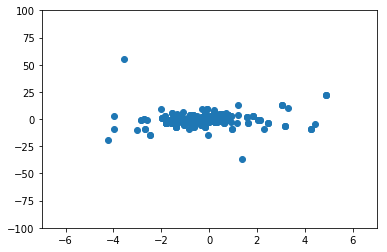

In [103]:
import matplotlib.pyplot as plt
plt.scatter(principalDf.loc[:,'principal component 1'],principalDf.loc[:,'principal component 2'])
plt.axis([-7.0,7.0, -100, 100])
plt.show()